In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [3]:
# parse date time from day, month, year, hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

In [4]:
# make datetime as index
df.set_index('datetime', inplace=True)

In [5]:
# drop NaN
df.dropna(inplace=True)

In [6]:
# label encoder
from sklearn.preprocessing import LabelEncoder
df['cbwd'] = LabelEncoder().fit_transform(df['cbwd'])

In [7]:
plt.rcParams['figure.figsize'] = 17, 8

In [8]:
feature_cols = ['pm2.5', 'DEWP', 'TEMP', 'Iws']

In [9]:
def make(dataframe, key):
    data = dataframe[key]
    plt.style.use('ggplot')
    plt.plot(data, label=key)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel(key)
    plt.title(key + ' Plot')
    plt.show(block=False)

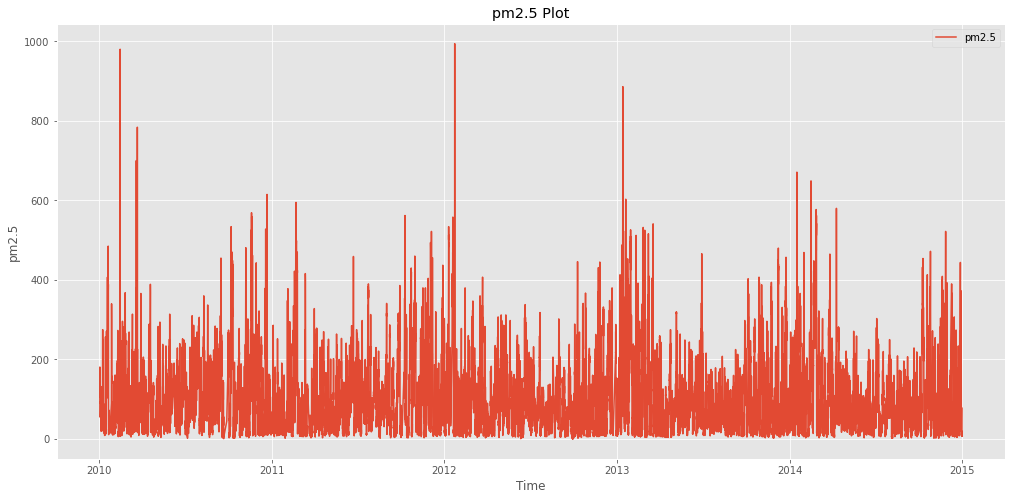

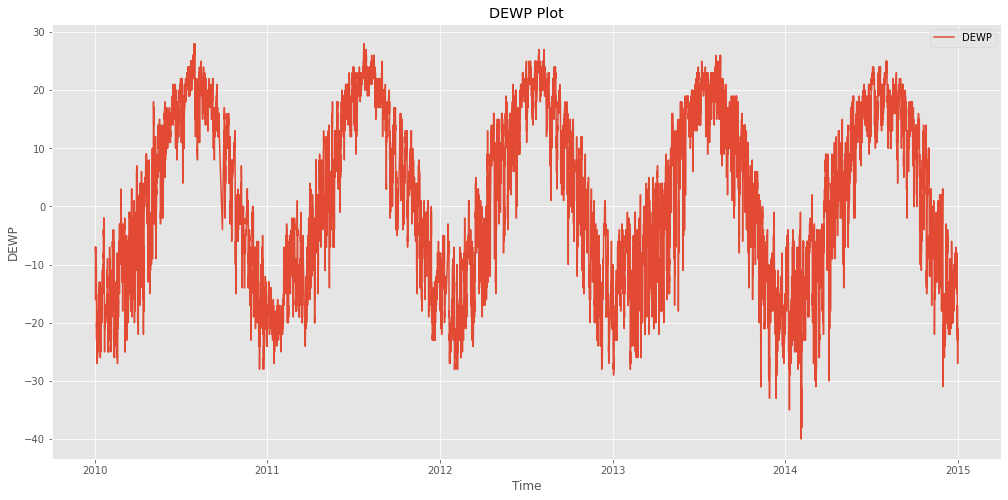

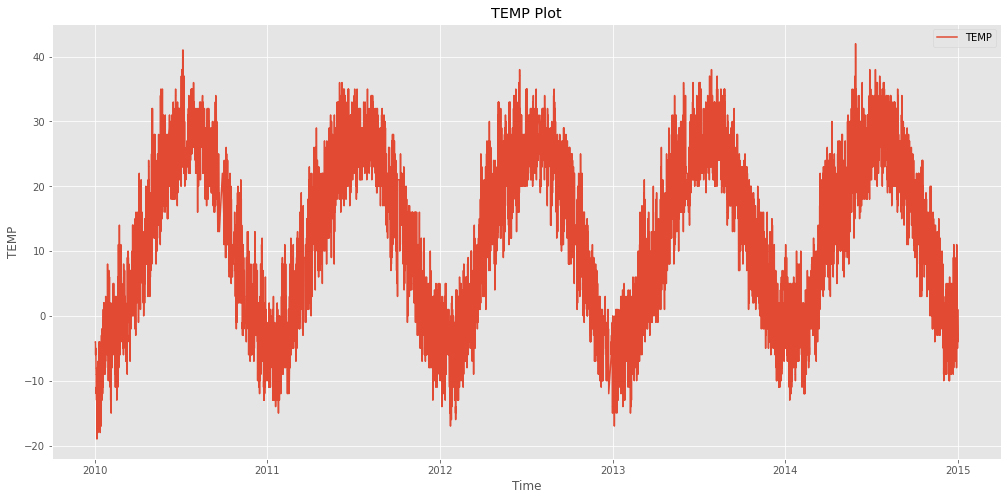

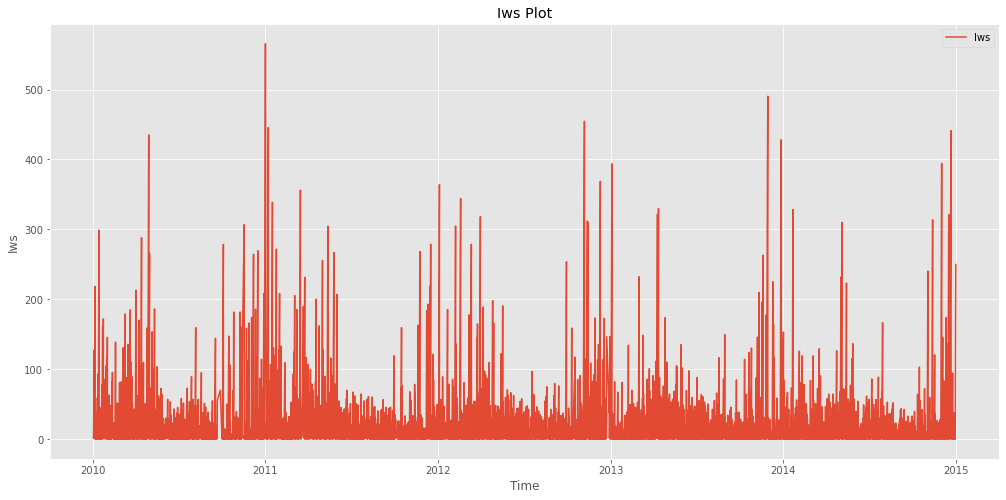

In [10]:
for i in feature_cols:
    make(df, i)

In [11]:
def make_plot(dataframe, key, limit=0):
    data = dataframe[key].head(limit) if limit else dataframe[key]
    plt.plot(data, label=key)
    plt.plot(data.rolling(24).mean(), color='red', label='Rolling Mean ' + key)
    plt.plot(data.rolling(24).std(), color='black', label='Rolling Standard Deviation ' + key)
    plt.legend(loc='best')
    plt.xlabel('Time')
    plt.ylabel(key)
    plt.title(key + ' Plot')
    plt.show(block=False)

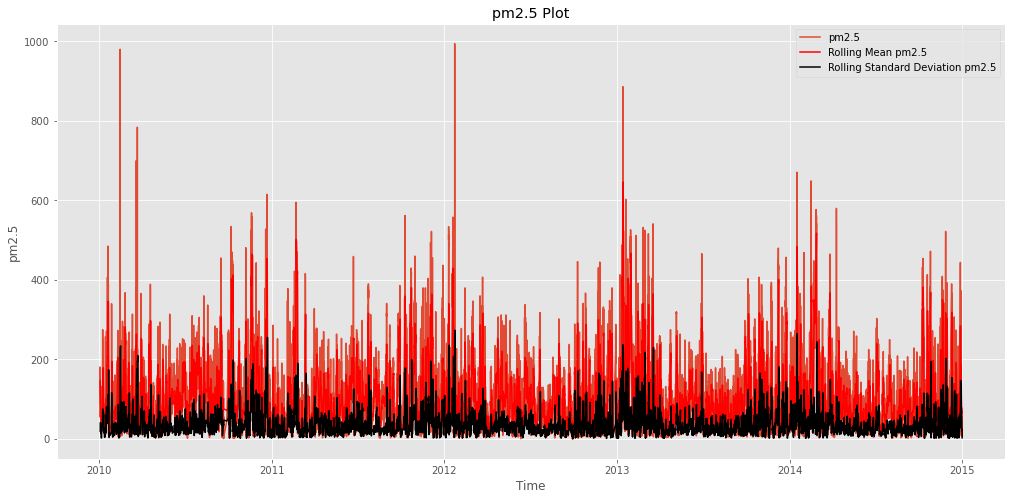

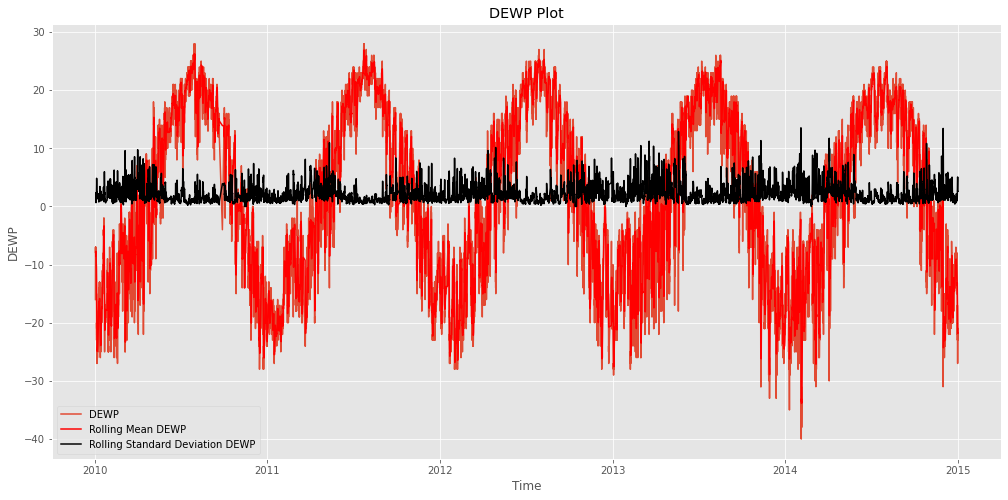

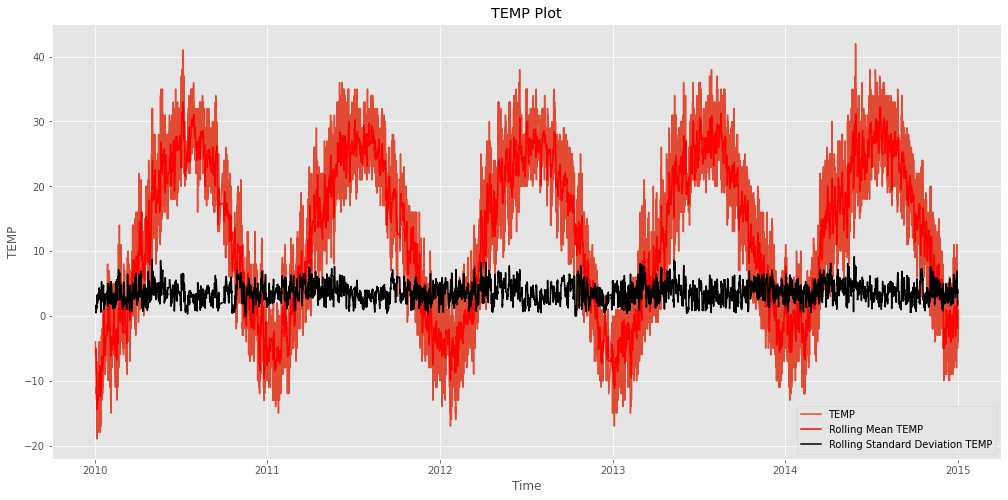

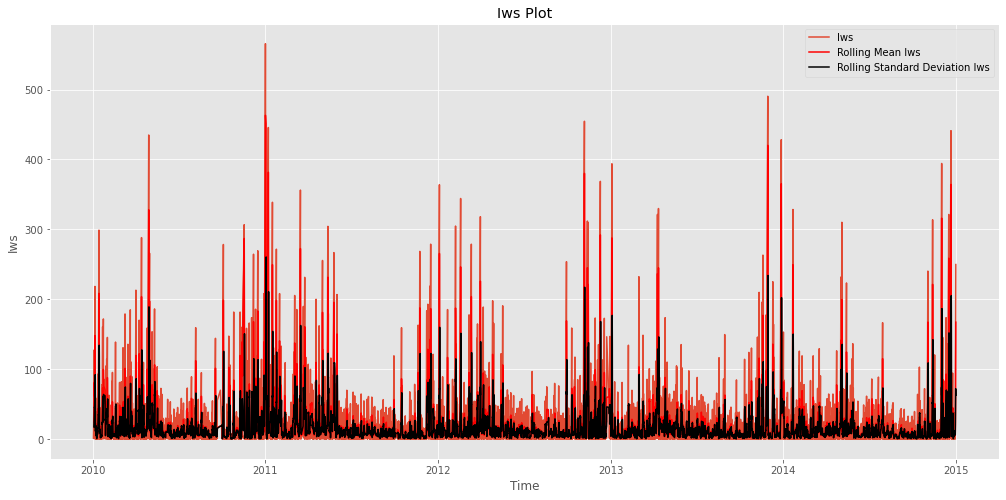

In [12]:
for key in feature_cols:
    make_plot(df, key)

In [13]:
# create weekday column
from datetime import datetime
# Monday is 0 and Sunday is 6
df['weekday'] = [i.weekday() for i in df.index]

In [14]:
# create a dataset every day at 12h
dataset_12 = df[df['hour'] == 12]
dataset_12.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,weekday
datetime,,,,,,,,,,,,,,
2010-01-02 12:00:00,37,2010,1,2,12,148.0,-8,-5.0,1026.0,2,23.69,0,0,5
2010-01-03 12:00:00,61,2010,1,3,12,107.0,-11,-9.0,1021.0,2,105.93,17,0,6
2010-01-04 12:00:00,85,2010,1,4,12,29.0,-21,-11.0,1030.0,1,117.55,0,0,0
2010-01-05 12:00:00,109,2010,1,5,12,27.0,-25,-12.0,1034.0,0,39.35,0,0,1
2010-01-06 12:00:00,133,2010,1,6,12,28.0,-24,-10.0,1034.0,0,59.00,0,0,2
2010-01-07 12:00:00,157,2010,1,7,12,42.0,-21,-9.0,1035.0,1,19.22,0,0,3
2010-01-08 12:00:00,181,2010,1,8,12,198.0,-16,-9.0,1028.0,2,3.13,0,0,4
2010-01-09 12:00:00,205,2010,1,9,12,40.0,-16,-6.0,1029.0,0,23.24,0,0,5
2010-01-10 12:00:00,229,2010,1,10,12,75.0,-15,-7.0,1032.0,1,6.26,0,0,6


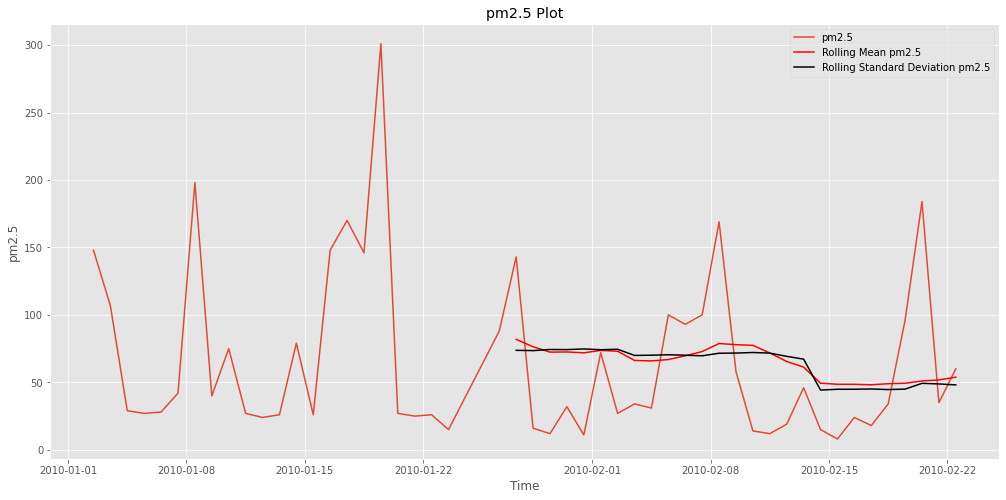

In [15]:
make_plot(dataset_12, 'pm2.5', 50)

In [16]:
data = dataset_12['pm2.5'].values
weekday = dataset_12.index

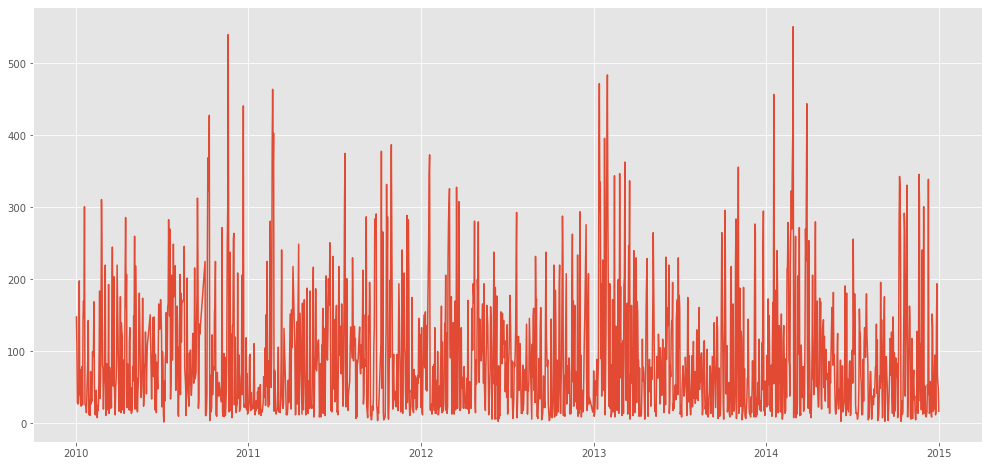

In [17]:
fig, ax = plt.subplots()
ax.plot(weekday, data)

In [31]:
pm25 = df['pm2.5'].to_list()
dewp = df['DEWP'].to_list()
temp = df['TEMP'].to_list()
time = df.index.to_list()

In [44]:
rcParams['figure.facecolor'] = 'blue'

NameError: name 'rcParams' is not defined

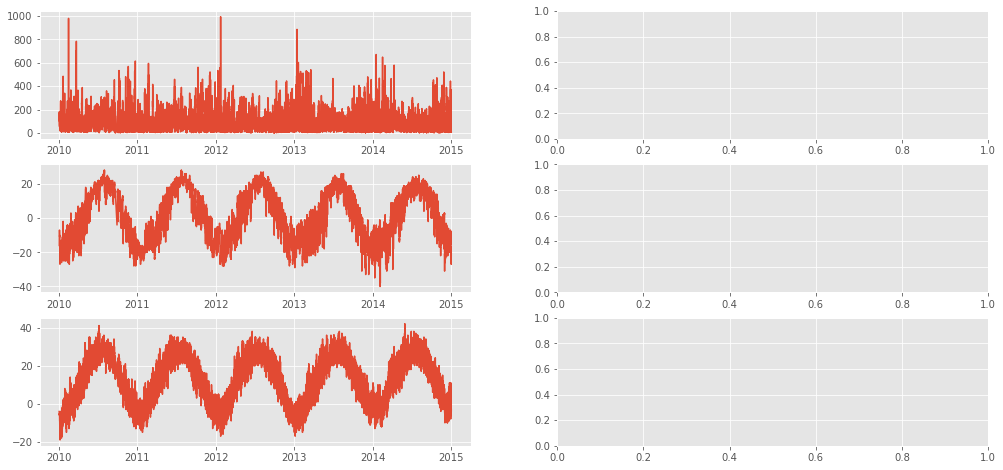

In [40]:
fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(time, pm25)
# ax[0, 0].set_title('Pm2.5 before')
ax[1, 0].plot(time, dewp)
# ax[1, 0].set_title('Dewp before')
ax[2, 0].plot(time, temp)
# ax[2, 0].set_title('Temp before')

# for i in ax.flat:
#     i.label_outer()